# MOONS

In [217]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# Preparing Data

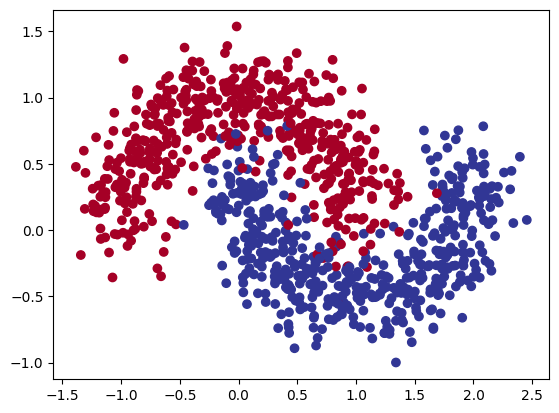

In [218]:
X, y = make_moons(n_samples = 1000, noise = 0.2, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)
plt.show()

In [219]:
print(isinstance(X, np.ndarray))
print(isinstance(y, np.ndarray))

True
True


In [220]:
# convering X, y into Tensors
X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

# Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

# Building ANN

In [221]:
class MoonsModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2,
                             out_features = 16)
    self.relu1 = nn.ReLU() # Rectifier Activation function
    self.layer_2 = nn.Linear(in_features = 16,
                             out_features = 16)
    self.relu2 = nn.ReLU()
    self.layer_3 = nn.Linear(in_features = 16,
                             out_features = 1)
  def forward(self, x):
    x = self.relu1(self.layer_1(x))
    x = self.relu2(self.layer_2(x))
    x = self.layer_3(x)
    return x

In [222]:
model = MoonsModel()

In [223]:
with torch.inference_mode():
  y_logits = model(X_test)
  y_pred_probs = torch.sigmoid(y_logits) # Probabilities are between 0 and 1
  y_labels = torch.round(y_pred_probs) # Probabilities will br either 0 or 1

In [224]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test.numpy(), y_labels.numpy())
print("Initial model predictions: ", acc)

Initial model predictions:  0.275


In [225]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.01)

# Training and Testing loop

In [226]:
epoch_count = []
train_loss_values = []
test_loss_values = []

epochs = 700

for epoch in range(epochs):
  model.train()

  y_logits = model(X_train)
  y_pred_probs = torch.sigmoid(y_logits)
  y_labels = torch.round(y_pred_probs)

  loss = loss_fn(y_logits, y_train.unsqueeze(dim=1).float())

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test)
    test_pred_probs = torch.sigmoid(test_logits)
    test_labels = torch.round(test_pred_probs)

    test_loss = loss_fn(test_logits, y_test.unsqueeze(dim=1).float())

  if epoch % 20 == 0:
    print(f"Epoch : {epoch} | Train Loss : {loss:.4f} | Test loss : {test_loss:4f} ")


Epoch : 0 | Train Loss : 0.7034 | Test loss : 0.687986 
Epoch : 20 | Train Loss : 0.4141 | Test loss : 0.418297 
Epoch : 40 | Train Loss : 0.2683 | Test loss : 0.270373 
Epoch : 60 | Train Loss : 0.2254 | Test loss : 0.225975 
Epoch : 80 | Train Loss : 0.1767 | Test loss : 0.176416 
Epoch : 100 | Train Loss : 0.1265 | Test loss : 0.131472 
Epoch : 120 | Train Loss : 0.0990 | Test loss : 0.103851 
Epoch : 140 | Train Loss : 0.0898 | Test loss : 0.097396 
Epoch : 160 | Train Loss : 0.0872 | Test loss : 0.096005 
Epoch : 180 | Train Loss : 0.0861 | Test loss : 0.095240 
Epoch : 200 | Train Loss : 0.0856 | Test loss : 0.094853 
Epoch : 220 | Train Loss : 0.0853 | Test loss : 0.095339 
Epoch : 240 | Train Loss : 0.0850 | Test loss : 0.095092 
Epoch : 260 | Train Loss : 0.0847 | Test loss : 0.093724 
Epoch : 280 | Train Loss : 0.0844 | Test loss : 0.093357 
Epoch : 300 | Train Loss : 0.0842 | Test loss : 0.094183 
Epoch : 320 | Train Loss : 0.0838 | Test loss : 0.092578 
Epoch : 340 | Train 

# Accuracy Testing

In [227]:
with torch.inference_mode():
  test_logits = model(X_test)
  test_pred_probs = torch.sigmoid(test_logits)
  test_labels = torch.round(test_pred_probs)

accuracy = (test_labels.squeeze() == y_test).sum().item() / len(y_test)
print(f"Final Test Accuracy : {accuracy:.4f}")
print("Final Test Accuracy : ", accuracy_score(test_labels.squeeze(), y_test)) # From sklearn.metrics

Final Test Accuracy : 0.9700
Final Test Accuracy :  0.97


In [228]:
# Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    model.eval()
    with torch.inference_mode():
        x_min, x_max = X[:,0].min().item() - 0.1, X[:,0].max().item() + 0.1
        y_min, y_max = X[:,1].min().item() - 0.1, X[:,1].max().item() + 0.1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        grid = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
        preds = torch.sigmoid(model(grid))
        preds = preds.reshape(xx.shape)

        plt.contourf(xx, yy, preds, cmap=plt.cm.RdYlBu, alpha=0.7)
        plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
        plt.title("Decision Boundary")
        plt.show()

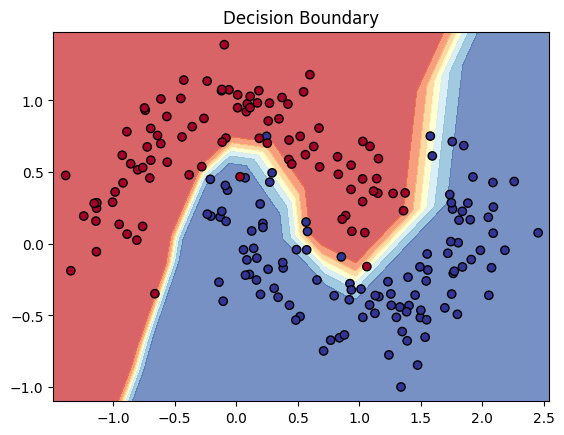

In [229]:
plot_decision_boundary(model, X_test, y_test)